# Load the data

In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, TimeSeriesSplit

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,id,artist_id,nb_tracks,duration,explicit_lyrics,days_since_first_release,total_albums_released,release_year,release_month,release_day_of_month,...,average_days_to_release_in_last_year,average_days_to_release_in_last_2_years,average_days_to_release_in_last_3_years,average_days_to_release_in_last_5_years,average_days_to_release_in_last_year_for_release_type,average_days_to_release_in_last_2_years_for_release_type,average_days_to_release_in_last_3_years_for_release_type,days_since_previous_release,average_days_to_release_in_last_5_years_for_release_type,average_days_to_release
0,77126682,13011,28,6054,1,3244,10,2015,8,21,...,82.5,84.0,91.0,105.0,122.5,117.0,121.0,158.0,133.0,360.0
1,9816130,13011,8,1753,0,3086,9,2015,3,16,...,87.0,95.0,101.0,115.5,115.0,124.0,131.5,1050.0,153.0,386.0
2,1641895,13011,12,3194,0,2036,8,2012,4,30,...,147.0,160.0,143.0,156.0,164.0,192.0,175.0,73.0,187.5,291.0
3,1523930,13011,4,922,0,1963,7,2012,2,17,...,143.0,158.0,139.0,159.0,161.0,184.0,168.0,338.0,192.0,327.0
4,7768602,1095,13,4112,0,2135,11,2014,6,2,...,91.0,105.0,112.0,119.0,117.0,126.0,133.0,343.0,157.0,214.0


In [3]:
df.shape

(7284, 25)

In [4]:
# only singles
# df = df[df['record_type_single'] == 1]

# only albums
# df = df[df['record_type_album'] == 1]

In [5]:
df = df.sort_values(['release_year', 'release_month', 'release_day_of_month'])
df.head()

,id,artist_id,nb_tracks,duration,explicit_lyrics,days_since_first_release,total_albums_released,release_year,release_month,release_day_of_month,...,average_days_to_release_in_last_year,average_days_to_release_in_last_2_years,average_days_to_release_in_last_3_years,average_days_to_release_in_last_5_years,average_days_to_release_in_last_year_for_release_type,average_days_to_release_in_last_2_years_for_release_type,average_days_to_release_in_last_3_years_for_release_type,days_since_previous_release,average_days_to_release_in_last_5_years_for_release_type,average_days_to_release
713,7726073,2419,9,1932,0,1000,6,2012,1,1,...,133.0,149.0,140.5,159.0,156.0,184.5,169.0,10.0,193.0,200.0
939,1575391,171,10,2556,0,4296,10,2012,1,1,...,133.0,149.0,140.5,159.0,156.0,184.5,169.0,124.0,193.0,477.0
2309,8166310,13188,14,2019,0,12346,29,2012,1,1,...,133.0,149.0,140.5,159.0,156.0,184.5,169.0,100.0,193.0,441.0
2310,8166260,13188,15,2207,0,12346,29,2012,1,1,...,133.0,149.0,140.5,159.0,156.0,184.5,169.0,100.0,193.0,441.0
4184,15484954,4742,37,8875,0,14671,41,2012,1,1,...,133.0,149.0,140.5,159.0,156.0,184.5,169.0,166.0,193.0,367.0


In [6]:
# df[df['release_year'] >= 2010].shape

In [7]:
# df = df[df['release_year'] >= 2010]

In [8]:
y = (df['days_until_next_album'] > df['days_since_previous_release']).astype(int)
X = df.drop(['days_until_next_album', 'id'], axis=1)
y.shape, X.shape

((7284,), (7284, 23))

In [9]:
X.head()

,artist_id,nb_tracks,duration,explicit_lyrics,days_since_first_release,total_albums_released,release_year,release_month,release_day_of_month,release_day_of_week,...,average_days_to_release_in_last_year,average_days_to_release_in_last_2_years,average_days_to_release_in_last_3_years,average_days_to_release_in_last_5_years,average_days_to_release_in_last_year_for_release_type,average_days_to_release_in_last_2_years_for_release_type,average_days_to_release_in_last_3_years_for_release_type,days_since_previous_release,average_days_to_release_in_last_5_years_for_release_type,average_days_to_release
713,2419,9,1932,0,1000,6,2012,1,1,6,...,133.0,149.0,140.5,159.0,156.0,184.5,169.0,10.0,193.0,200.0
939,171,10,2556,0,4296,10,2012,1,1,6,...,133.0,149.0,140.5,159.0,156.0,184.5,169.0,124.0,193.0,477.0
2309,13188,14,2019,0,12346,29,2012,1,1,6,...,133.0,149.0,140.5,159.0,156.0,184.5,169.0,100.0,193.0,441.0
2310,13188,15,2207,0,12346,29,2012,1,1,6,...,133.0,149.0,140.5,159.0,156.0,184.5,169.0,100.0,193.0,441.0
4184,4742,37,8875,0,14671,41,2012,1,1,6,...,133.0,149.0,140.5,159.0,156.0,184.5,169.0,166.0,193.0,367.0


In [10]:
y.head()

713     1
939     1
2309    1
2310    1
4184    0
dtype: int64

# Train/Test split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6555, 23), (729, 23), (6555,), (729,))

In [13]:
# X_cv, X_test, y_cv, y_test = train_test_split(X_test, y_test, test_size=0.5, shuffle=False)
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [14]:
X_train.head()

,artist_id,nb_tracks,duration,explicit_lyrics,days_since_first_release,total_albums_released,release_year,release_month,release_day_of_month,release_day_of_week,...,average_days_to_release_in_last_year,average_days_to_release_in_last_2_years,average_days_to_release_in_last_3_years,average_days_to_release_in_last_5_years,average_days_to_release_in_last_year_for_release_type,average_days_to_release_in_last_2_years_for_release_type,average_days_to_release_in_last_3_years_for_release_type,days_since_previous_release,average_days_to_release_in_last_5_years_for_release_type,average_days_to_release
713,2419,9,1932,0,1000,6,2012,1,1,6,...,133.0,149.0,140.5,159.0,156.0,184.5,169.0,10.0,193.0,200.0
939,171,10,2556,0,4296,10,2012,1,1,6,...,133.0,149.0,140.5,159.0,156.0,184.5,169.0,124.0,193.0,477.0
2309,13188,14,2019,0,12346,29,2012,1,1,6,...,133.0,149.0,140.5,159.0,156.0,184.5,169.0,100.0,193.0,441.0
2310,13188,15,2207,0,12346,29,2012,1,1,6,...,133.0,149.0,140.5,159.0,156.0,184.5,169.0,100.0,193.0,441.0
4184,4742,37,8875,0,14671,41,2012,1,1,6,...,133.0,149.0,140.5,159.0,156.0,184.5,169.0,166.0,193.0,367.0


In [15]:
# X_cv.head()

In [16]:
X_test.head()

,artist_id,nb_tracks,duration,explicit_lyrics,days_since_first_release,total_albums_released,release_year,release_month,release_day_of_month,release_day_of_week,...,average_days_to_release_in_last_year,average_days_to_release_in_last_2_years,average_days_to_release_in_last_3_years,average_days_to_release_in_last_5_years,average_days_to_release_in_last_year_for_release_type,average_days_to_release_in_last_2_years_for_release_type,average_days_to_release_in_last_3_years_for_release_type,days_since_previous_release,average_days_to_release_in_last_5_years_for_release_type,average_days_to_release
4190,4742,1,259,0,17061,55,2018,7,18,2,...,45.0,49.0,56.0,63.0,35.0,35.0,38.0,39.0,42.0,316.0
7124,2619,1,204,0,5045,56,2018,7,18,2,...,45.0,49.0,56.0,63.0,35.0,35.0,38.0,1013.0,42.0,92.0
2762,85,1,165,0,9838,51,2018,7,19,3,...,45.0,49.0,55.0,63.0,35.0,35.0,38.0,655.0,42.0,197.0
888,2098,1,229,0,8601,48,2018,7,20,4,...,44.0,49.0,55.0,63.0,35.0,35.0,38.0,28.0,42.0,183.0
3228,163,3,1203,0,10343,61,2018,7,20,4,...,44.0,49.0,55.0,63.0,35.0,35.0,38.0,49.0,42.0,172.0


# Baseline (Dummy Regressor)

In [17]:
from sklearn.dummy import DummyRegressor

In [18]:
model = DummyRegressor(strategy='median')
model.fit(X_train, y_train)

DummyRegressor(constant=None, quantile=None, strategy='median')

In [19]:
model.score(X_train, y_train)

-0.8157894736842106

In [20]:
model.score(X_test, y_test)

-0.5510638297872339

In [21]:
model = DummyRegressor(strategy='mean')
model.fit(X_train, y_train)

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [22]:
model.score(X_train, y_train)

0.0

In [23]:
model.score(X_test, y_test)

-0.038570843123793

# Feature scaling

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()
scaler.fit(X_train)

/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [26]:
X_train = scaler.transform(X_train)
# X_cv = scaler.transform(X_cv)
X_test = scaler.transform(X_test)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
X_train.shape

(6555, 23)

# PCA

In [28]:
from sklearn.decomposition import PCA

In [29]:
pca = PCA(
    n_components=0.99,
    svd_solver='full',
    random_state=1000
)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.99, random_state=1000,
  svd_solver='full', tol=0.0, whiten=False)

In [30]:
# X_train = pca.transform(X_train)
# # X_cv = pca.transform(X_cv)
# X_test = pca.transform(X_test)

In [31]:
X_train.shape

(6555, 23)

# Feature selection

In [32]:
# from sklearn.feature_selection import RFE
# from sklearn.ensemble import RandomForestRegressor

In [33]:
# estimator = RandomForestRegressor(random_state=1000, n_jobs=-1)
# selector = RFE(estimator, 10, step=1)
# selector = selector.fit(X_train, y_train)

In [34]:
# selector.support_

In [35]:
# X_train = selector.transform(X_train)
# # X_cv = selector.transform(X_cv)
# X_test = selector.transform(X_test)

In [36]:
# X_train.shape

# LogisticRegression regression

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
model = LogisticRegression(
    n_jobs=-1
)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,
          penalty='l2', random_state=None, solver='warn', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
model.score(X_train, y_train)

0.6977879481311976

In [43]:
model.score(X_test, y_test)

0.6502057613168725

# SVR

In [44]:
from sklearn.svm import SVC

In [133]:
# model = SVR(
#     C=0.1,
#     epsilon=0.2
# )
# model.fit(X_train, y_train)

Cs = [0.001, 0.01, 0.1, 1, 10, 100, 200, 300]
gammas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = {
    'C': Cs,
    'gamma': gammas,
#     'kernel': kernels,
}

cv = TimeSeriesSplit(n_splits=3)

hyperparameters_search = GridSearchCV(
    SVC(),
    param_grid,
    cv=cv,
    n_jobs=-1
)
hyperparameters_search.fit(X_train, y_train)
hyperparameters_search.best_params_

{'C': 300, 'gamma': 0.0001}

In [134]:
hyperparameters_search.best_score_

0.6664631664631665

In [135]:
model = hyperparameters_search.best_estimator_
model

SVC(C=300, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [136]:
model.score(X_train, y_train)

0.6900076277650649

In [137]:
# model.score(X_cv, y_cv)

In [138]:
model.score(X_test, y_test)

0.6268861454046639

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
# y_test_pred = model.predict(X_test)
# plt.scatter(y_test, y_test_pred)

# Random Forest model

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
# model = RandomForestRegressor(
#     n_estimators=100,
#     max_depth=50,
# #     max_features=5,
# #     min_samples_leaf=1,
# #     criterion='mse',
#     random_state=0, n_jobs=-1
# )
# model.fit(X_train, y_train)

n_estimators = [10, 20, 50, 100, 200]
max_depth = [None, 1, 2, 3, 5, 7, 10, 15]
max_features = [None, 1, 2, 3, 5, 7, 10, 15, 'auto']
min_samples_leaf = [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5]
param_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'max_features': max_features,
    'min_samples_leaf': min_samples_leaf,
}

cv = TimeSeriesSplit(n_splits=7)

hyperparameters_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=0),
    param_grid,
    cv=cv,
    n_jobs=-1
)
hyperparameters_search.fit(X_train, y_train)
hyperparameters_search.best_params_

{'max_depth': 10,
 'max_features': 15,
 'min_samples_leaf': 0.001,
 'n_estimators': 50}

In [55]:
hyperparameters_search.best_score_

0.17810309190332468

In [56]:
model = hyperparameters_search.best_estimator_
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features=15, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=0.001,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=50, n_jobs=None, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [57]:
model.score(X_train, y_train)

0.5489352508137566

In [58]:
model.score(X_test, y_test)

0.21650200955297882

In [59]:
model.feature_importances_

array([5.89922372e-02, 1.49211762e-02, 4.41430441e-02, 7.74316274e-04,
       6.10839788e-02, 5.06700132e-02, 2.32203234e-03, 2.87038556e-02,
       3.50087121e-02, 2.06134114e-02, 2.71777880e-04, 1.88507539e-06,
       1.20374395e-04, 2.05070534e-02, 1.36318332e-02, 1.31813720e-02,
       1.18799935e-02, 2.95503709e-02, 2.57469410e-02, 2.69596938e-02,
       4.56123319e-01, 2.54688227e-02, 5.93237864e-02])

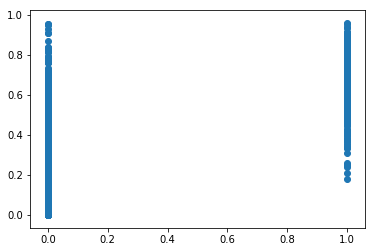

In [60]:
y_test_pred = model.predict(X_test)
plt.scatter(y_test, y_test_pred)

# XGBoost

In [63]:
# !pip install xgboost

In [62]:
from xgboost import XGBClassifier

In [115]:
model = XGBClassifier(
    max_depth=3,
#     subsample=0.9,
#     colsample_bytree=0.9,
#     colsample_bylevel=0.9,
#     min_child_weight=1,
    random_state=0, n_jobs=-1
)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [116]:
model.score(X_train, y_train)

0.7673531655225019

In [117]:
model.score(X_test, y_test)

0.7379972565157751

# MLP

In [80]:
from sklearn.neural_network import MLPClassifier

In [130]:
model = MLPClassifier(
    hidden_layer_sizes=(100,),
    max_iter=200,
    alpha=0.1,
    warm_start=True,
    random_state=0,
)
model.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=True)

In [131]:
model.score(X_train, y_train)

0.7617086193745233

In [132]:
model.score(X_test, y_test)

0.6831275720164609

In [111]:
# model.predict(X_train)

In [112]:
# y_train[0]

# Catboost

In [84]:
!pip install catboost
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [86]:
from catboost import CatBoostClassifier

In [87]:
model = CatBoostClassifier(
#     iterations=700,
#     learning_rate=0.02,
#     depth=12,
#     eval_metric='RMSE',
#     random_seed = 23,
#     bagging_temperature = 0.2,
#     od_type='Iter',
#     metric_period = 75,
#     od_wait=100
)

In [88]:
model.fit(X_train, y_train,
#              eval_set=(X_test,y_valid),
#              cat_features=categorical_features_pos,
#              use_best_model=True,
#              verbose=True
         )

Learning rate set to 0.028524
0:	learn: 0.6854220	total: 100ms	remaining: 1m 39s
1:	learn: 0.6792561	total: 131ms	remaining: 1m 5s
2:	learn: 0.6717477	total: 162ms	remaining: 53.8s
3:	learn: 0.6653500	total: 198ms	remaining: 49.2s
4:	learn: 0.6587442	total: 289ms	remaining: 57.5s
5:	learn: 0.6531047	total: 329ms	remaining: 54.4s
6:	learn: 0.6468912	total: 364ms	remaining: 51.6s
7:	learn: 0.6413950	total: 396ms	remaining: 49.1s
8:	learn: 0.6354046	total: 480ms	remaining: 52.9s
9:	learn: 0.6305137	total: 534ms	remaining: 52.9s
10:	learn: 0.6254894	total: 657ms	remaining: 59.1s
11:	learn: 0.6203284	total: 774ms	remaining: 1m 3s
12:	learn: 0.6161137	total: 904ms	remaining: 1m 8s
13:	learn: 0.6125940	total: 1.01s	remaining: 1m 11s
14:	learn: 0.6085950	total: 1.1s	remaining: 1m 12s
15:	learn: 0.6048035	total: 1.15s	remaining: 1m 10s
16:	learn: 0.6013581	total: 1.2s	remaining: 1m 9s
17:	learn: 0.5981266	total: 1.36s	remaining: 1m 14s
18:	learn: 0.5959667	total: 1.4s	remaining: 1m 12s
19:	lear

In [89]:
model.score(X_train, y_train)

0.8090007627765065

In [90]:
model.score(X_test, y_test)

0.5775034293552812

# Keras

In [122]:
!pip install keras

    100% |████████████████████████████████| 317kB 2.9MB/s 
    100% |████████████████████████████████| 61kB 5.8MB/s 
    100% |████████████████████████████████| 6.1MB 1.5MB/s 
    100% |████████████████████████████████| 61kB 6.7MB/s 
